## Predator Prey Agent-based modelling

There are a lot of possible ABMs for any given phenomenon. cadCAD allows you to add, modify and remove simulation blocks and steps at will. 

For this demo, we'll adopt a model based on a grid world, on which preys and predators take the following actions at each timestep of their lifes:

1. Food is grown on every site.
2. All agents digest some of the food on their stomach and get older.
3. All agents move (if possible) to an available random neighboring location.
4. The agents reproduce themselves if there is an available partner nearby
5. The prey agents feed on the available food
6. The predator agents hunts the nearby preys
7. All old enough agents die

There is an inherent stochastic nature on this model, and every time that you run it, we'll have a completely different result for the same parameters. But we can see that there is sort of a random equilibrium that converges to the dynamical equilibrium which we presented on the dynamical simulation.

ABMs tend to produce rich, high density datasets. We'll plot some of this data, but invite the reader to fork this repository and trace the network relations between the agents, or the geospatial statistics around the ABM, for example.

In [1]:
# Dependences
import pandas as pd
import numpy as np

# Experiments
from model import run
from model.parts.utils import *
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (40, 7, 3, 2)
Execution Method: local_simulations
SimIDs   : [0, 0, 0]
SubsetIDs: [0, 0, 0]
Ns       : [0, 1, 2]
ExpIDs   : [0, 0, 0]
Execution Mode: parallelized
Total execution time: 2.95s


In [3]:
rdf.head()

,timestep,run,prey_count,predator_count,food_at_sites,food_at_prey,food_at_predators,median_site_food,median_prey_food,median_predator_food,prey_median_age,predator_median_age
7,1,1,20,26,1521.00,293.00,210.00,6.50,15.50,8.00,1.00,1.00
14,2,1,18,30,1939.43,351.37,296.91,8.88,22.38,7.00,2.00,2.00
21,3,1,16,29,2252.00,318.23,306.05,10.00,21.88,6.00,3.00,3.00
28,4,1,16,26,2322.00,320.23,277.05,10.00,20.88,5.00,4.00,4.00
35,5,1,16,23,2392.00,305.84,270.44,10.00,19.88,5.00,5.00,5.00


### Prey predator phase space

Note that it sorts of converges, in a chaotic manner, to the dynamical system model

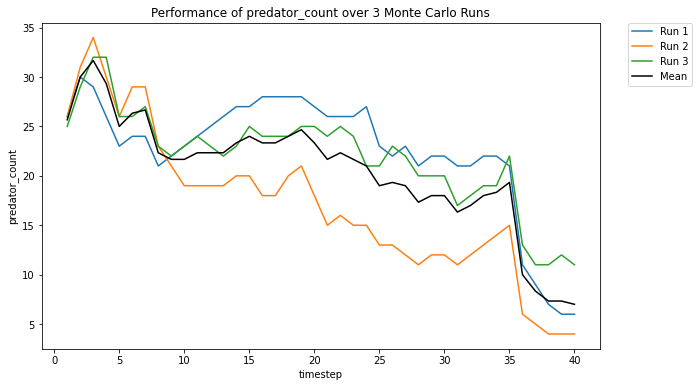

In [4]:
monte_carlo_plot(rdf,'timestep','timestep','predator_count',3)

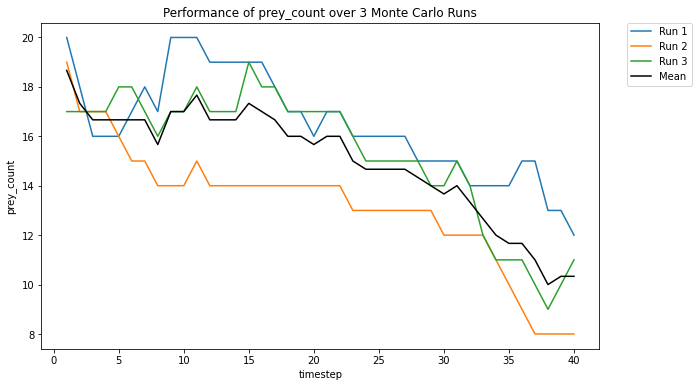

In [5]:
monte_carlo_plot(rdf,'timestep','timestep','prey_count',3)

### Prey prevalence vs food availability on the world

There is an inverse relation between the available food on the grid, and the number of prey.

From the code, can you tell why there is higher variance when the number of prey is higher?

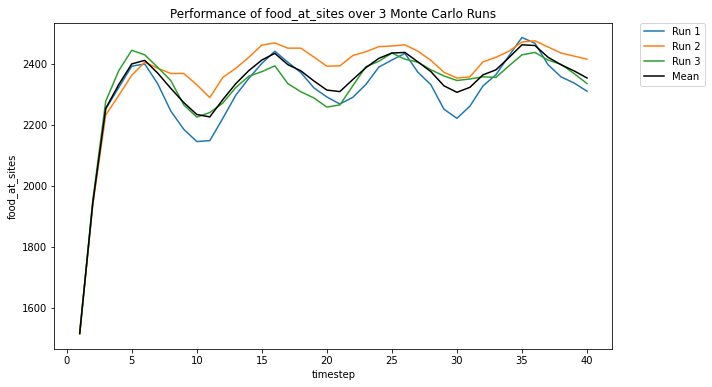

In [6]:
monte_carlo_plot(rdf,'timestep','timestep','food_at_sites',3)

#### Food inside agents stomachs

On average, the prey stomachs are always quite full, while the predators stomachs contents vary more.

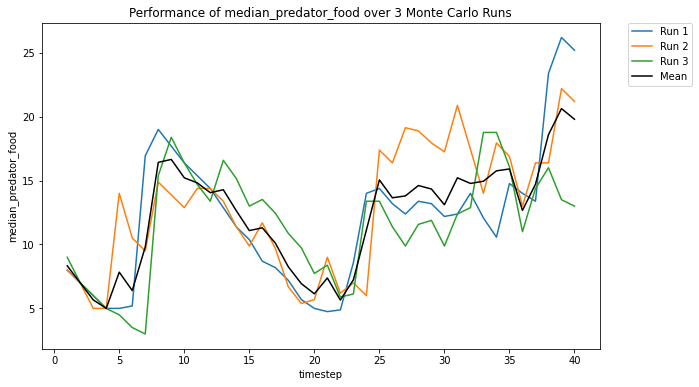

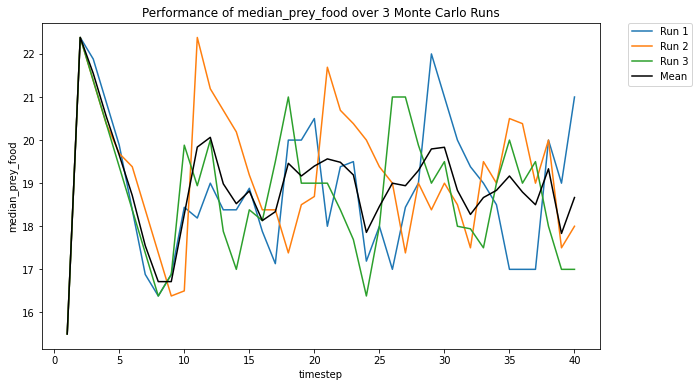

In [7]:
monte_carlo_plot(rdf,'timestep','timestep','median_predator_food',3)
monte_carlo_plot(rdf,'timestep','timestep','median_prey_food',3)

#### Predator and Prey median age

On average, this result is cyclical

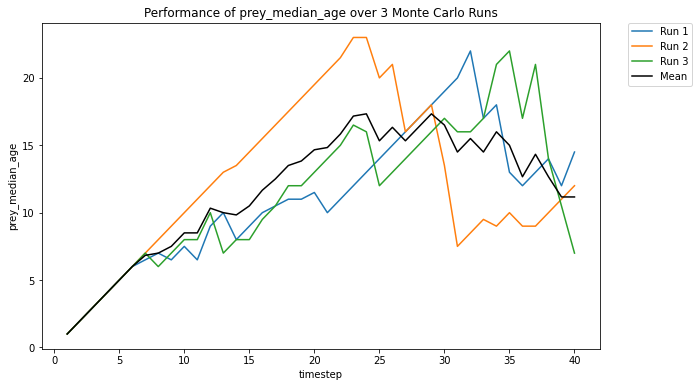

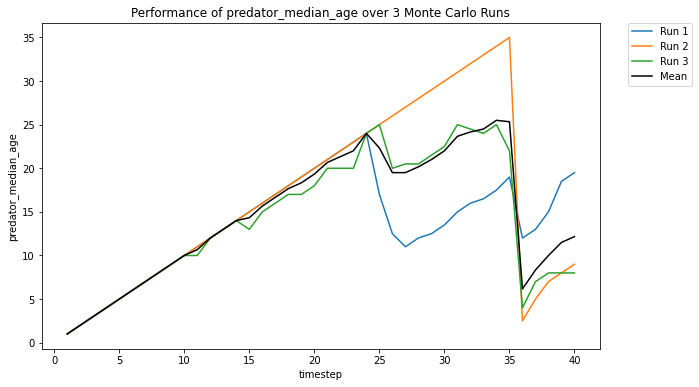

In [8]:
monte_carlo_plot(rdf,'timestep','timestep','prey_median_age',3)
monte_carlo_plot(rdf,'timestep','timestep','predator_median_age',3)
